### Test $k_p$ branch

Print out emulator calls and find a log like for a given point in compressed parameter space. I'm running this notebook with the latest kp_change branch and with commit `fe6459468c6370db24e6ab4e2ce2f6a4ccb99e80` (which was shortly before changes to the `recons_cosmo` branch). As far as I understand it these two versions of the code should return the same set of emulator calls for a given point in likelihood space when not changing $g_\star$ or $f_\star$, but this is currently not what I find.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 140
mpl.rcParams['figure.dpi'] = 140
import numpy as np
# our modules
import likelihood
import data_MPGADGET
import gp_emulator
import p1d_arxiv
import time

In [2]:
# specify simulation suite and P1D mesurements
basedir="/p1d_emulator/sim_suites/Australia20/"
skewers_label='Ns500_wM0.05'
p1d_label=None
# specify simulation to use to generate synthetic data
test_sim_num=15
data=data_MPGADGET.P1D_MPGADGET(sim_number=test_sim_num,
                                basedir=basedir,
                                skewers_label=skewers_label,
                                data_cov_factor=1)

In [3]:
# specify redshift range
z_max=4
# do not use test_sim_num that was used in generating mock data
arxiv=p1d_arxiv.ArxivP1D(basedir=basedir,drop_sim_number=test_sim_num,
                            drop_tau_rescalings=True,z_max=z_max,
                            drop_temp_rescalings=True,skewers_label=skewers_label)

In [4]:
# specify parameters to be used in emulator
paramList=['mF', 'sigT_Mpc', 'gamma', 'kF_Mpc', 'Delta2_p', 'n_p']
# specify k range
kmax_Mpc=8
# setup GP emulator
emu=gp_emulator.GPEmulator(basedir,p1d_label,skewers_label,z_max=z_max,
                                verbose=True,paramList=paramList,train=False,
                                emu_type="k_bin",passArxiv=arxiv,kmax_Mpc=kmax_Mpc)
emu.load_default()

Loading emulator using a specific arxiv, not the one set in basedir
Rescaled params to unity volume
Rescaled params to unity volume
Emulator hyperparameters loaded


 /Users/font/Programs/Others/anaconda3/lib/python3.6/site-packages/paramz/parameterized.py:61: RuntimeWarning:Don't forget to initialize by self.initialize_parameter()!


In [5]:
# Likelihood parameters
like_params=["Delta2_star","n_star","ln_tau_0","ln_tau_1","ln_sigT_kms_0","ln_sigT_kms_1",
             "ln_gamma_0","ln_gamma_1","ln_kF_0","ln_kF_1"]
like_param_limits=[[0.24, 0.47], [-2.352, -2.25], [-0.2, 0.2], [-0.2, 0.2], [-0.2, 0.2], [-0.2, 0.2], 
                   [-0.2, 0.2], [-0.2, 0.2], [-0.2, 0.2], [-0.2, 0.2]]

In [6]:
like=likelihood.Likelihood(data=data,emulator=emu,
                            free_parameters=like_params,
                            free_param_limits=like_param_limits,
                            verbose=False,
                            prior_Gauss_rms=-1,
                            emu_cov_factor=1,
                            use_sim_cosmo=False)
like.go_loud()

## Compare emulator calls

In [7]:
## Evaluate log_prob at random point in parameter space
theta=np.ones(len(like_params))*0.5 ## Just pick the middle of likelihood space
print('starting point')
for par in like.parameters_from_sampling_point(theta):
    print(par.info_str())
tic=time.perf_counter()
like_test=like.log_prob(theta)
toc=time.perf_counter()
print('like test',like_test)
print("Took ", toc-tic, "s to evaluate a likelihood")

starting point
Delta2_star = 0.355
n_star = -2.301
ln_tau_0 = 0.0
ln_tau_1 = 0.0
ln_sigT_kms_0 = 0.0
ln_sigT_kms_1 = 0.0
ln_gamma_0 = 0.0
ln_gamma_1 = 0.0
ln_kF_0 = 0.0
ln_kF_1 = 0.0
not using fiducial linP_model
will compute parameters for input linP_model
(20,) qB [0.00456494 0.00491047 0.00528214 0.00568195 0.00611202 0.00657465
 0.00707228 0.00760759 0.00818341 0.00880282 0.00946911 0.01018583
 0.01095681 0.01178613 0.01267823 0.01363785 0.01467011 0.0157805
 0.01697494 0.01825978]
(20,) lnqB_kp [-0.67881816 -0.6058553  -0.53289244 -0.45992958 -0.38696671 -0.31400385
 -0.24104099 -0.16807813 -0.09511527 -0.02215241  0.05081045  0.12377331
  0.19673617  0.26969904  0.3426619   0.41562476  0.48858762  0.56155048
  0.63451334  0.7074762 ]
(20,) lnB [-0.01334497 -0.0134664  -0.01358784 -0.01370927 -0.01383071 -0.01395214
 -0.01407358 -0.01419501 -0.01431644 -0.01443788 -0.01455931 -0.01468075
 -0.01480218 -0.01492362 -0.01504505 -0.01516649 -0.01528792 -0.01540936
 -0.01553079 -0.01565

In [8]:
emu_calls=like.theory.get_emulator_calls(like.parameters_from_sampling_point(theta))
print('emulator calls',emu_calls)

not using fiducial linP_model
will compute parameters for input linP_model
(20,) qB [0.00456494 0.00491047 0.00528214 0.00568195 0.00611202 0.00657465
 0.00707228 0.00760759 0.00818341 0.00880282 0.00946911 0.01018583
 0.01095681 0.01178613 0.01267823 0.01363785 0.01467011 0.0157805
 0.01697494 0.01825978]
(20,) lnqB_kp [-0.67881816 -0.6058553  -0.53289244 -0.45992958 -0.38696671 -0.31400385
 -0.24104099 -0.16807813 -0.09511527 -0.02215241  0.05081045  0.12377331
  0.19673617  0.26969904  0.3426619   0.41562476  0.48858762  0.56155048
  0.63451334  0.7074762 ]
(20,) lnB [-0.01334497 -0.0134664  -0.01358784 -0.01370927 -0.01383071 -0.01395214
 -0.01407358 -0.01419501 -0.01431644 -0.01443788 -0.01455931 -0.01468075
 -0.01480218 -0.01492362 -0.01504505 -0.01516649 -0.01528792 -0.01540936
 -0.01553079 -0.01565222]
(20,) qB [0.00456494 0.00491047 0.00528214 0.00568195 0.00611202 0.00657465
 0.00707228 0.00760759 0.00818341 0.00880282 0.00946911 0.01018583
 0.01095681 0.01178613 0.01267823 0

using fiducial linP_model
use fiducial linP_model
0 2.0 model {'Delta2_p': 0.6362068065698854, 'n_p': -2.302948958159187, 'alpha_p': -0.21533440645116048, 'mF': 0.8507256483811173, 'gamma': 1.5534927645653829, 'sigT_Mpc': 0.13078611068417573, 'kF_Mpc': 9.234642271117814}
1 2.25 model {'Delta2_p': 0.5453327046037872, 'n_p': -2.302940185954645, 'alpha_p': -0.21533985625486332, 'mF': 0.8145423945568311, 'gamma': 1.5449855838581277, 'sigT_Mpc': 0.13051263566195997, 'kF_Mpc': 9.574544756852742}
2 2.5 model {'Delta2_p': 0.47230334591203543, 'n_p': -2.302931549951045, 'alpha_p': -0.21534589027820866, 'mF': 0.7709160253724354, 'gamma': 1.535466821877, 'sigT_Mpc': 0.12986720978610813, 'kF_Mpc': 9.91377946463774}
3 2.75 model {'Delta2_p': 0.4128215439140031, 'n_p': -2.3029227596033928, 'alpha_p': -0.21535172198417493, 'mF': 0.7191184346490203, 'gamma': 1.5246254858011445, 'sigT_Mpc': 0.1290634736772292, 'kF_Mpc': 10.258134266642541}
4 3.0 model {'Delta2_p': 0.36378320986727575, 'n_p': -2.3029144

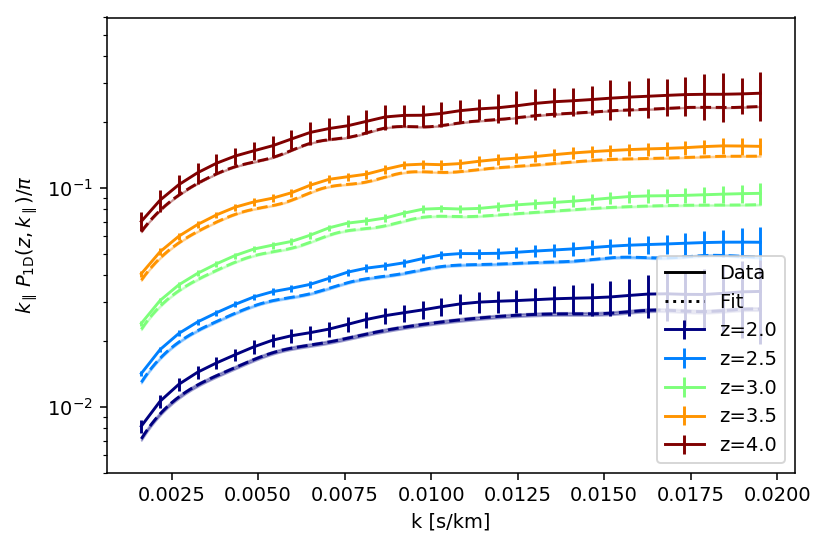

In [9]:
## Plot p1d to make sure emulator calls look reasonable by eye
## the emulator bug I found would result in huge uncertanties
## on the predicted p1d
like.plot_p1d(plot_every_iz=2)